# Test problem for Ag Package

#### Based on Sagehen example problem, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

## Plot high (0.85) and low (0.35) ET Trigger (ETww/ETa) values

### Get size of gage files and set start and end dates for plotting

In [3]:
# calculate number of lines in file can be any gage file
num_lines = 0
with open(r"..\output_GSFLOW_only\modflow\sagehensfr18_HighTrig.out", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values; this date is simulation starte date
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(1990, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(1991, 3, 1))
enddate.append(datetime.date(1994, 3, 1))

### Read and process the Ag diversion segment gage file for high trigger value (0.85)

In [4]:

#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr18_HighTrig.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr19_HighTrig.out","r")
#set firstline for headers
firstline=fname1.readline()
firstline=fname2.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_high_18, y2_high_18, y3_high_18, y4_high_18 = [], [], [], []
y1_high_19, y2_high_19, y3_high_19, y4_high_19 = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])
#        x.append(line.split()[0])
        y1_high_18.append(line.split()[4])
        y2_high_18.append(line.split()[5])
        y3_high_18.append(line.split()[6])
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        y1_high_19.append(line.split()[4])
        y2_high_19.append(line.split()[5])
        y3_high_19.append(line.split()[6])        
               
# close irrigation segment file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y1_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y1_high_18=x1
y1_high_18_cum=x1.cumsum()

x1=np.array(y2_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y2_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y2_high_18=x1

x1=np.array(y3_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
x2=np.array(y3_high_19,dtype=float)
x2=x2/1.62e5
x1=x1+x2
y3_high_18=x1

# sum SW+GW
x1=np.array(y2_high_18,dtype=float)
x2=np.array(y3_high_18,dtype=float)
x1=x1+x2
y4_high_18=x1
y4_high_18_cum=x1.cumsum()

#print out average annual NIWR
print(y1_high_18_cum[len(y1_high_18_cum)-1]/3)
print(y4_high_18_cum[len(y4_high_18_cum)-1]/3)

41.9099997468
1.13303497914


In [5]:
# set headers for plot legend
header=[]
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])

### Read and process the Ag diversion segment gage file for low Trigger value

In [6]:
#open irrigation segment file again to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfr18_LowTrig.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfr19_LowTrig.out","r")
#set firstline for headers
firstline=fname1.readline()
firstline=fname2.readline()
# store all data from file in lines
lines1=fname1.readlines()
lines2=fname2.readlines()
y1_low_18, y2_low_18, y3_low_18, y4_low_18 = [], [], [], []
y1_low_19, y2_low_19, y3_low_19, y4_low_19 = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_18.append(line.split()[4])
        y2_low_18.append(line.split()[5])
        y3_low_18.append(line.split()[6])
        
i=-1
for line in lines2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low_19.append(line.split()[4])
        y2_low_19.append(line.split()[5])
        y3_low_19.append(line.split()[6])
# close irrigation segment file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y1_low_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y1_low_18=x1
y1_low_18_cum=x1.cumsum()

x1=np.array(y2_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y2_low_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y2_low_18=x1

x1=np.array(y3_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y3_low_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y3_low_18=x1

# sum SW+GW
x1=np.array(y2_low_18,dtype=float)
x2=np.array(y3_low_18,dtype=float)
x1=x1+x2
y4_low_18=x1
y4_low_18_cum=x1.cumsum()

#print out average annual NIWR
print(y1_low_18_cum[len(y1_low_18_cum)-1]/3)
print(y4_low_18_cum[len(y4_low_18_cum)-1]/3)

41.9099997468
0.536337360076


### Read and process the Ag  segment ET gage file for High Trigger value

In [7]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret18_HighTrig.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret19_HighTrig.out","r")
#set firstline for headers
firstlineet=fname1.readline()
firstlineet=fname2.readline()
# set headers for plot legend
header2=[]
header2.append(firstlineet.split()[0])
header2.append(firstlineet.split()[1])
header2.append(firstlineet.split()[2])
header2.append(firstlineet.split()[3])
header2.append(firstlineet.split()[4])
header2.append(firstlineet.split()[5])
header2.append(firstlineet.split()[6])
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_high_18, y2et_high_18 = [], []
y1et_high_19, y2et_high_19 = [], []
y1et_high_18_cum, y2et_high_18_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_18.append(line.split()[4])
        y2et_high_18.append(line.split()[5])

i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_high_19.append(line.split()[4])
        y2et_high_19.append(line.split()[5])
        
# close SW ET file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1et_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y1et_high_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y1et_high_18=x1
y1et_high_18_cum=x1.cumsum()

x1=np.array(y2et_high_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y2et_high_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y2et_high_18=x1
y2et_high_18_cum=x1.cumsum()

#print out average annual ET
print(y1et_high_18_cum[len(y1et_high_18_cum)-1]/3)
print(y2et_high_18_cum[len(y2et_high_18_cum)-1]/3)


1.05854916536
1.05159389453


### Read and process the Ag  segment ET gage file for Low Trigger (0.35) value

In [8]:
#open SW ET file to read lines
fname1 = open(r"..\output_GSFLOW_only\modflow\sagehensfret18_LowTrig.out","r")
fname2 = open(r"..\output_GSFLOW_only\modflow\sagehensfret19_LowTrig.out","r")
#set firstline for headers
firstlineet=fname1.readline()
firstlineet=fname2.readline()
# set headers for plot legend
header2=[]
header2.append(firstlineet.split()[0])
header2.append(firstlineet.split()[1])
header2.append(firstlineet.split()[2])
header2.append(firstlineet.split()[3])
header2.append(firstlineet.split()[4])
header2.append(firstlineet.split()[5])
header2.append(firstlineet.split()[6])
# store all data from file in lines
lineset1=fname1.readlines()
lineset2=fname2.readlines()
y1et_low_18, y2et_low_18 = [], []
y1et_low_19, y2et_low_19 = [], []
y1et_low_18_cum, y2et_low_18_cum = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset1:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_18.append(line.split()[4])
        y2et_low_18.append(line.split()[5])

i=-1
for line in lineset2:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low_19.append(line.split()[4])
        y2et_low_19.append(line.split()[5])
        
# close SW ET file
fname1.close()
fname2.close()

# sum segments
x1=np.array(y1et_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y1et_low_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y1et_low_18=x1
y1et_low_18_cum=x1.cumsum()

x1=np.array(y2et_low_18,dtype=float)
# convert to hectare-meter
x1=x1/1.134e5
#x1=x1.cumsum()
x2=np.array(y2et_low_19,dtype=float)
x2=x2/1.62e5
#x2=x2.cumsum()
x1=x1+x2
y2et_low_18=x1
y2et_low_18_cum=x1.cumsum()

#print out average annual ET
print(y1et_low_18_cum[len(y1et_low_18_cum)-1]/3)
print(y2et_low_18_cum[len(y2et_low_18_cum)-1]/3)


1.05854916536
0.852355439714


### Plot NIWR and ET for low and high trigger

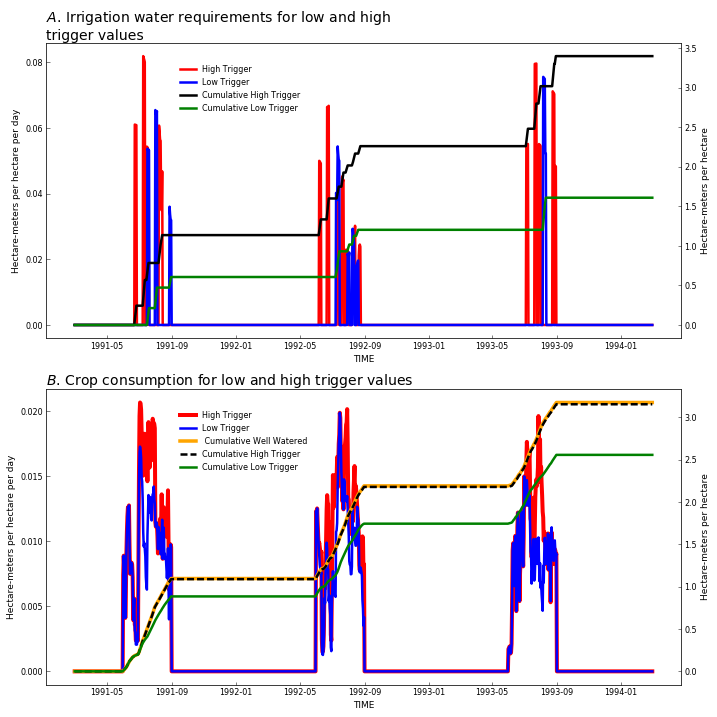

In [26]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis = axis.flat

# NIWR plot
lns1 = axis[0].plot(plotdates,y4_high_18,color='r', linewidth=2.5, label="High Trigger")
lns2 = axis[0].plot(plotdates,y4_low_18,color='b', linewidth=2.5, label="Low Trigger")
ax2 = axis[0].twinx()
lns3 = ax2.plot(plotdates, y4_high_18_cum, color='black', linewidth=2.5, label="Cumulative High Trigger")
lns4 = ax2.plot(plotdates, y4_low_18_cum, color='green', linewidth=2.5, label="Cumulative Low Trigger")
axis[0].set_ylabel('Hectare-meters per hectare per day')
axis[0].set_xlabel(header[0])
ax2.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax1
# Set legend
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
axis[0].legend(lns, labs, loc=0, bbox_to_anchor=(.2, 0.95))

# ET plot
lns1 = axis[1].plot(plotdates,y2et_high_18,color='r', linewidth=4, label="High Trigger")
lns2 = axis[1].plot(plotdates,y2et_low_18,color='b', linewidth=2.5, label="Low Trigger")
ax3 = axis[1].twinx()
lns3 = ax3.plot(plotdates,y1et_high_18_cum,color='orange', linewidth=3.5, label=" Cumulative Well Watered")
lns4 = ax3.plot(plotdates, y2et_high_18_cum,'--', color='black', linewidth=2.5, label="Cumulative High Trigger")
#dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off
#lns4.set_dashes(dashes)
lns5 = ax3.plot(plotdates, y2et_low_18_cum, color='green', linewidth=2.5, label="Cumulative Low Trigger")
axis[1].set_ylabel('Hectare-meters per hectare per day')
axis[1].set_xlabel(header[0])
ax2.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax1
# Set legend
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
axis[1].legend(lns, labs, loc=0, bbox_to_anchor=(.2, 0.95))


plt.ylabel('Hectare-meters per hectare')
plt.xlabel(header[0])

start, end = axis[0].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))

rf.title(axis[0], 'Irrigation water requirements for low and high trigger values', subplot_prefix='A')

#rf.axis_numbering(axis[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axis[1], 'Crop consumption for low and high trigger values', subplot_prefix='B')

plt.tight_layout()
plt.savefig('WR_triggercomp.pdf')

### Plot just NIWR and consumption for high trigger

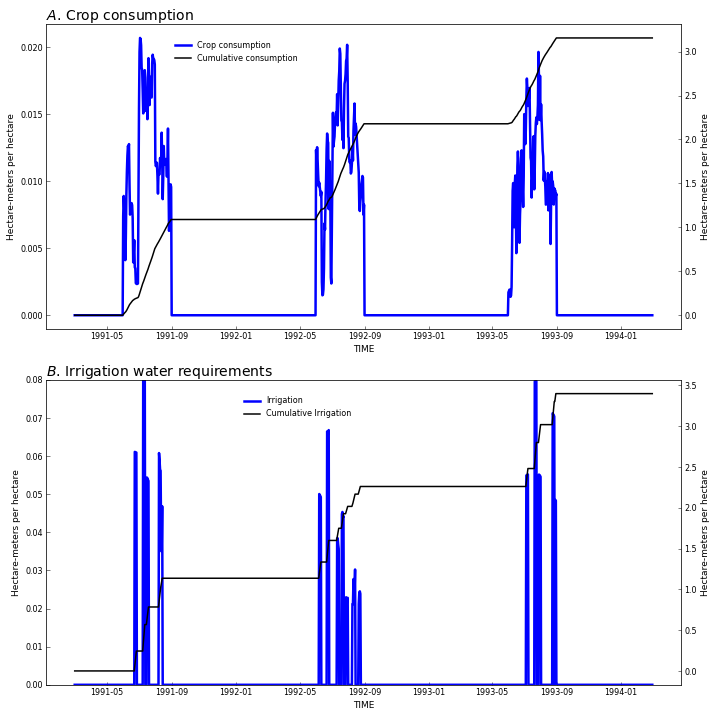

In [10]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis = axis.flat

lns1=axis[1].plot(plotdates,y4_high_18,color='b', linewidth=2.5, label="Irrigation")

# set axis range to specified value
plt.xlim(plotdates[0],plotdates[len(plotdates)-1])
plt.ylim(0.0,0.08)

ax2 = axis[1].twinx()  # instantiate a second axes on ET plots that shares the same x-axis
#add precip as separate y-axis
lns2 = ax2.plot(plotdates, y4_high_18_cum, color='black', linewidth=1.5, label="Cumulative Irrigation")
axis[1].set_ylabel('Hectare-meters per hectare')
axis[1].set_xlabel(header[0])

ax2.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax1

start, end = axis[1].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))
rf.title(axis[1], 'Irrigation water delivery for low and high crop coefficients', subplot_prefix='A')

# Set legend
lns = lns1+lns2
labs = [l.get_label() for l in lns]
axis[1].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.85))


lns3 = axis[0].plot(plotdates,y2et_high_18,color='b', linewidth=2.5, label="Crop consumption")

axis[0].set_ylabel('Hectare-meters per hectare')
axis[0].set_xlabel(header[0])

ax3 = axis[0].twinx()  # instantiate a second axes on NIWR plots that shares the same x-axis
#add precip as separate y-axis
lns4 = ax3.plot(plotdates, y2et_high_18_cum, color='black', linewidth=1.5, label="Cumulative consumption")

ax3.set_ylabel('Hectare-meters per hectare', color='black')  # we already handled the x-label with ax3

# Set legend
lns5 = lns3+lns4
labs = [l.get_label() for l in lns5]
axis[0].legend(lns, labs, loc=0, bbox_to_anchor=(.3, 0.85))


plt.ylabel('Hectare-meters per hectare')
plt.xlabel(header[0])

start, end = axis[0].get_xlim()
#axis[0].xaxis.set_ticks(np.arange(start, end, 90.0))

rf.title(axis[0], 'Crop consumption', subplot_prefix='A')

#rf.axis_numbering(axis[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axis[1], 'Irrigation water requirements', subplot_prefix='B')

# Set legend
#handles, labels = axis[0].get_legend_handles_labels()
#rf.legend(axis[0], handles, labels, bbox_to_anchor=(.9, 0.15))

# Set legend
#handles, labels = axis[1].get_legend_handles_labels()
#rf.legend(axis[1], handles, labels, bbox_to_anchor=(.9, 0.15))

plt.tight_layout()
plt.savefig('WR_demand.pdf')